<h1 style="font-size:60px">Sephora Products and Skincare Reviews💄 </h1>  

# About the Dataset 📊

This dataset was collected via Python scraper in March 2023 and contains:

1. Information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
2. User reviews (over 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

This dataset contains multiple csv files such as:
* ***product_info.csv*** that contains information about all products from the Sephora online store
* 6 csv files that contains all reviews of the skincare products that can be used for ***sentiment analysis***

##  🔃 Load data
There are few of csv files and I'll be merge it into one dataset.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
df_product_info = pd.read_csv("/content/product_info.csv")
df_reviews_1 = pd.read_csv("/content/reviews_0-250.csv",index_col = 0, dtype={'author_id':'str'},nrows=155042)
df_reviews_2 = pd.read_csv("/content/reviews_250-500.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_3 = pd.read_csv("/content/reviews_500-750.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_4 = pd.read_csv("/content/reviews_750-1250.csv",index_col = 0, dtype={'author_id':'str'})
df_reviews_5 = pd.read_csv("/content/reviews_750-1250.csv",index_col = 0, dtype={'author_id':'str'})


In [5]:
# Merge df_reviews_1 till df_reviews_6
df_reviews = pd.concat([df_reviews_1,df_reviews_2,df_reviews_3,df_reviews_4,df_reviews_5],axis=0)
print("df_reviews shape: ",df_reviews.shape)
print("df_product_info shape: ",df_product_info.shape)

df_reviews shape:  (692521, 18)
df_product_info shape:  (8494, 27)


In [6]:
# Lets check df_product_info which columns that similar with df_reviews
cols_to_use = df_product_info.columns.difference(df_reviews.columns)
cols_to_use = list(cols_to_use)
cols_to_use.append('product_id')
print(cols_to_use)

['brand_id', 'child_count', 'child_max_price', 'child_min_price', 'highlights', 'ingredients', 'limited_edition', 'loves_count', 'new', 'online_only', 'out_of_stock', 'primary_category', 'reviews', 'sale_price_usd', 'secondary_category', 'sephora_exclusive', 'size', 'tertiary_category', 'value_price_usd', 'variation_desc', 'variation_type', 'variation_value', 'product_id']


🗒️
* The merged dataset from reviews (**df_reviews**) have 1301136 rows and 18 columns

* The product info dataset (**df_product_info**) have 8494 rows and 27 columns

**Notes:**

Because of both dataset have the same columns of product_id. I'll merge it using outer join.


In [7]:
df = pd.merge(df_reviews, df_product_info[cols_to_use], how='outer', on=['product_id', 'product_id'])
df.shape

(700030, 40)

In [8]:
df.head(5)

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,reviews,sale_price_usd,secondary_category,sephora_exclusive,size,tertiary_category,value_price_usd,variation_desc,variation_type,variation_value
0,1741593524,5.0,1.0,1.0,2.0,0.0,2.0,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,...,1.0,NaN,Cleansers,0.0,2.4 oz / 70 ml,NaN,NaN,NaN,Size,2.4 oz / 70 ml
1,31423088263,1.0,0.0,NaN,0.0,0.0,0.0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
2,5061282401,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
3,6083038851,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original
4,47056667835,5.0,1.0,NaN,0.0,0.0,0.0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,...,16118.0,NaN,Lip Balms & Treatments,1.0,0.7 oz/ 20 g,NaN,NaN,NaN,Color,Original


## 📦Data Pre-Processing



## 👻Handling missing values

In [9]:

missing = []
unique = []
types = []
variables = []
count = []

for item in df.columns:
    variables.append(item)
    missing.append(df[item].isnull().sum())
    unique.append(df[item].nunique())
    types.append(df[item].dtypes)
    count.append(len(df[item]))

output = pd.DataFrame({
    'variable': variables,
    'dtype': types,
    'count': count,
    'unique': unique,
    'missing': missing,

})
print("Df info : ")
output.sort_values("missing",ascending=False).reset_index(drop=True)

Df info : 


,variable,dtype,count,unique,missing
0,variation_desc,object,700030,935,697761
1,sale_price_usd,float64,700030,88,694486
2,value_price_usd,float64,700030,174,673705
3,child_max_price,float64,700030,222,454589
4,child_min_price,float64,700030,208,454589
5,helpfulness,float64,700030,2601,349012
6,review_title,object,700030,206990,206984
7,hair_color,object,700030,8,142076
8,eye_color,object,700030,6,125011
9,skin_tone,object,700030,14,107271


**Dropping Columns**

In the dataset, there few of columns that have a lot missing values.

So im gonna drop these columns.

In [10]:
cols = """variation_desc
sale_price_usd
value_price_usd
child_max_price
child_min_price
review_title"""
cols_list = cols.split("\n")
# Drop the columns
df.drop(columns=cols_list,axis=1,inplace=True)

**Dropping Rows**

Drop rows with missing values

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.describe()

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,brand_id,child_count,limited_edition,loves_count,new,online_only,out_of_stock,reviews,sephora_exclusive
count,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000,205572.00000,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000,205572.000000
mean,4.093928,0.777455,0.769028,8.600573,1.874511,6.726062,48.10151,5948.243185,0.599926,0.014063,85938.479307,0.012190,0.087736,0.016889,1355.634863,0.373869
std,1.329409,0.415956,0.315885,26.435618,7.801394,22.475702,36.87749,1099.153505,1.038035,0.117752,137227.281336,0.109735,0.282911,0.128858,1984.900749,0.483831
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.00000,1063.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000,0.000000
25%,4.000000,1.000000,0.651163,1.000000,0.000000,1.000000,28.00000,5987.000000,0.000000,0.000000,16958.000000,0.000000,0.000000,0.000000,291.000000,0.000000
50%,5.000000,1.000000,0.928571,4.000000,1.000000,3.000000,42.00000,6209.000000,0.000000,0.000000,37695.000000,0.000000,0.000000,0.000000,490.000000,0.000000
75%,5.000000,1.000000,1.000000,8.000000,2.000000,7.000000,62.00000,6289.000000,1.000000,0.000000,75403.000000,0.000000,0.000000,0.000000,985.000000,1.000000
max,5.000000,1.000000,1.000000,3851.000000,1094.000000,3481.000000,425.00000,8017.000000,12.000000,1.000000,763168.000000,1.000000,1.000000,1.000000,8733.000000,1.000000


In [13]:
df.shape

(205572, 34)

# 📈📉 Exploratory Data Analysis

In this section, I will perform an exploratory data analysis (EDA) on the  dataset. The goal of EDA is to gain insights and understanding of the dataset, identify patterns, relationships, and anomalies. Through EDA, we can make informed decisions on how to preprocess and model the data, as well as generate hypotheses for further analysis.

"I will start by analyzing the submission_time of the data and create new columns for day, month, year, and weekday. This will enable me to analyze various factors such as total_feedback_count, total_pos_feedback_count, total_neg_feedback_count, and their trends over the years."

In [14]:
df['submission_time'] = pd.to_datetime(df['submission_time'])

df['year']= df['submission_time'].dt.year

df['month']= df['submission_time'].dt.month

df['day']= df['submission_time'].dt.day

df['weekday']= df['submission_time'].dt.weekday

dw_mapping={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['dayofweek']= df['submission_time'].dt.weekday.map(dw_mapping)

In [15]:

from matplotlib.ticker import NullFormatter
import matplotlib as mpl
mpl.style.use(['ggplot'])
def hundformatter(x, pos):
    return str(round(x / 1e4, 1))

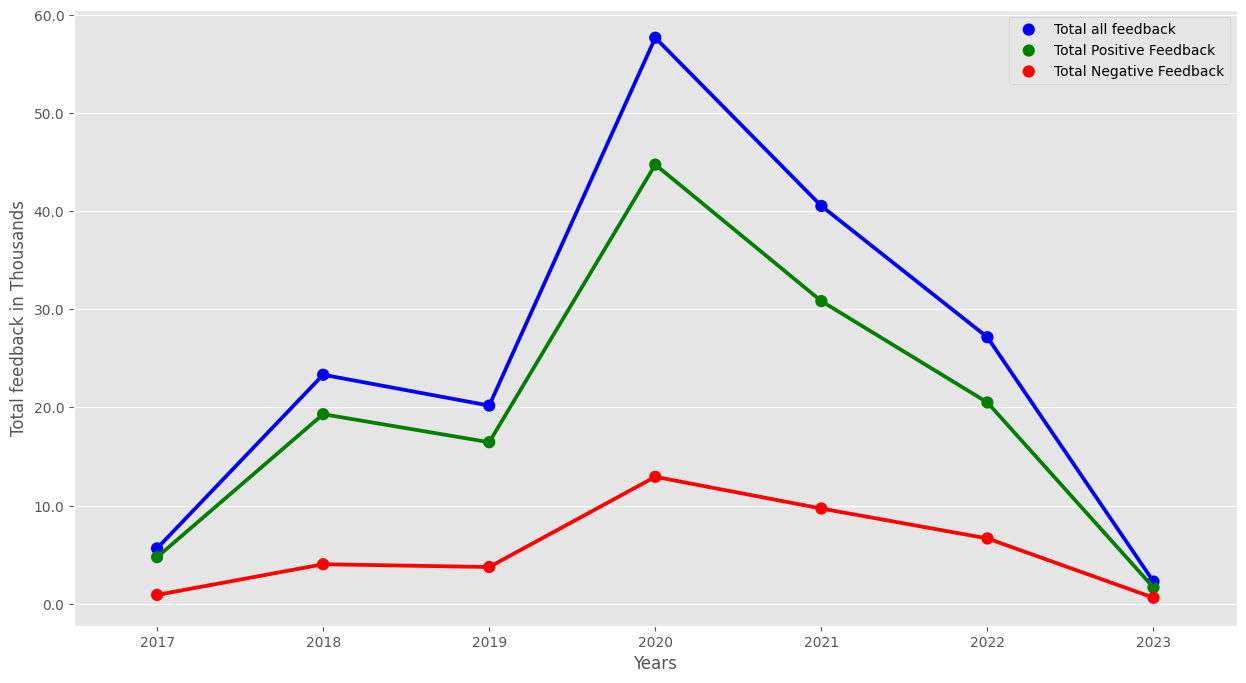

In [16]:
fig, (ax1) = plt.subplots(nrows=1,ncols=1,figsize= (15,8))
total_feedback = df.groupby('year').sum(numeric_only=True)['total_feedback_count'].reset_index()

sns.pointplot(total_feedback,x='year',y='total_feedback_count', color="blue", label="Total all feedback",ax=ax1)

total_pos_feedback = df.groupby('year').sum(numeric_only=True)['total_pos_feedback_count'].reset_index()
sns.pointplot(total_pos_feedback,x='year',y='total_pos_feedback_count', color="green", label="Total Positive Feedback",ax=ax1)

total_neg_feedback = df.groupby('year').sum(numeric_only=True)['total_neg_feedback_count'].reset_index()
sns.pointplot(total_neg_feedback,x='year',y='total_neg_feedback_count', color="red", label="Total Negative Feedback",ax=ax1)

ax1.yaxis.set_major_formatter(hundformatter)
ax1.set_ylabel("Total feedback in Thousands")
ax1.set_xlabel("Years")
ax1.legend()

Text(0.5, 0.98, 'Top 10 Product')

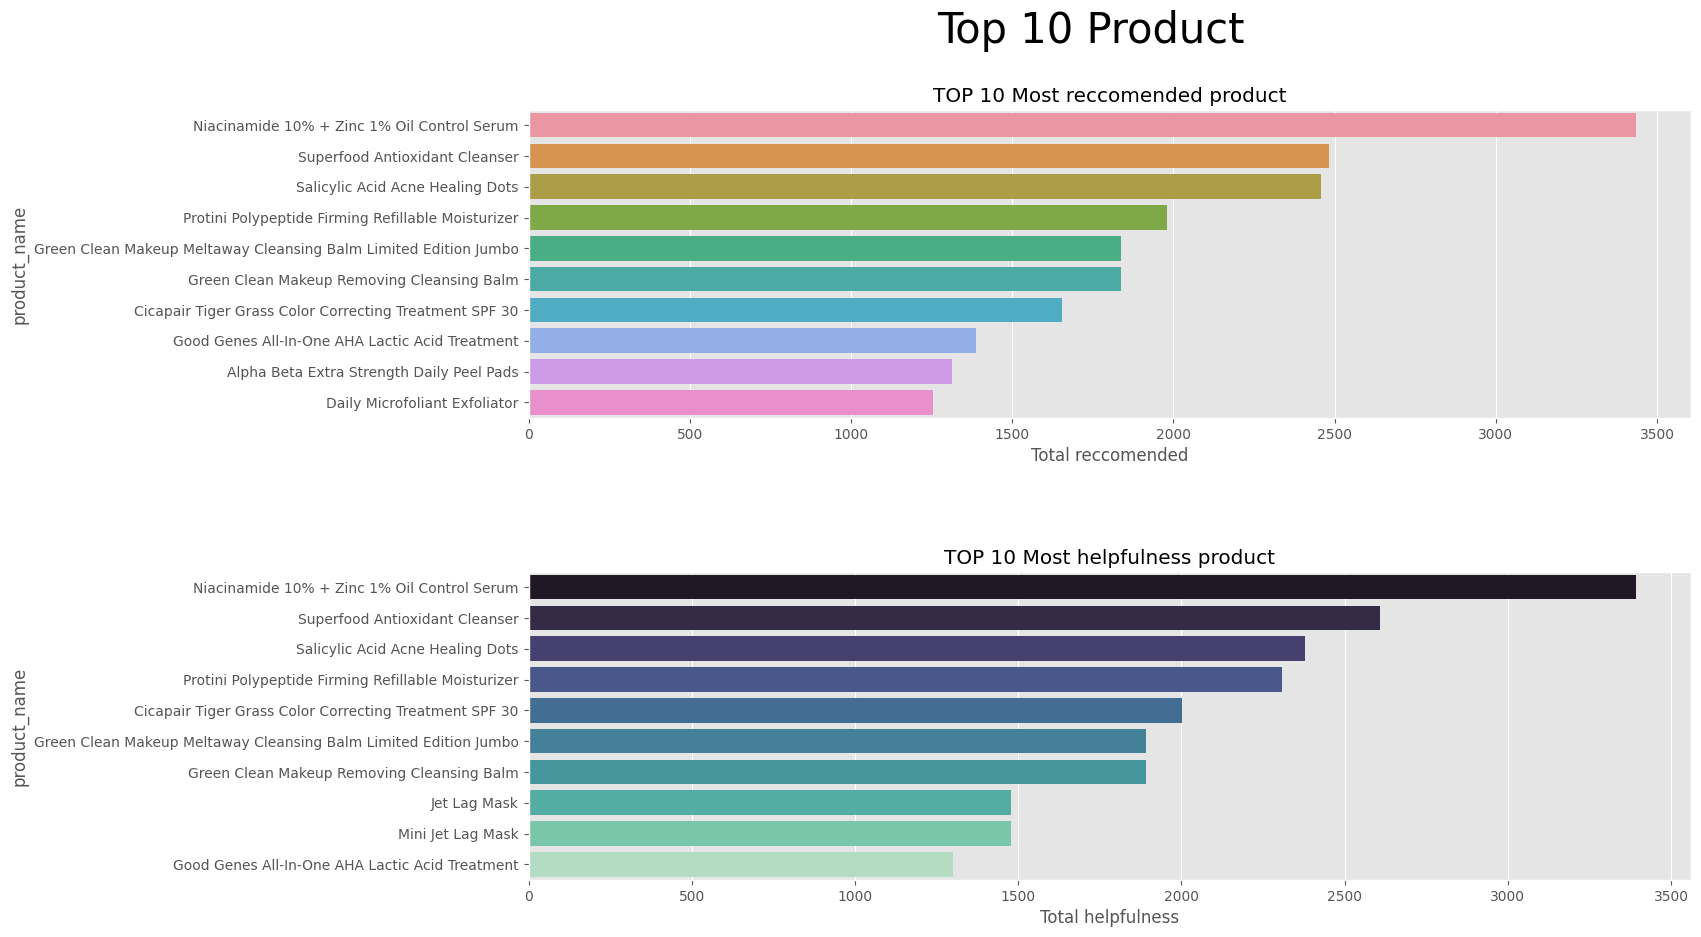

In [17]:
#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['is_recommended'].reset_index()\
.sort_values('is_recommended',ascending=False).head(10)
sns.barplot(most_reccomended,x='is_recommended',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most reccomended product")
ax1.set_xlabel("Total reccomended")

most_helpfulness = df.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['helpfulness'].reset_index()\
.sort_values('helpfulness',ascending=False).head(10)
sns.barplot(most_helpfulness,x='helpfulness',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most helpfulness product")
ax2.set_xlabel("Total helpfulness")

plt.suptitle("Top 10 Product",fontsize=30)

Text(0.5, 0.98, 'Top 10 Product based on price')

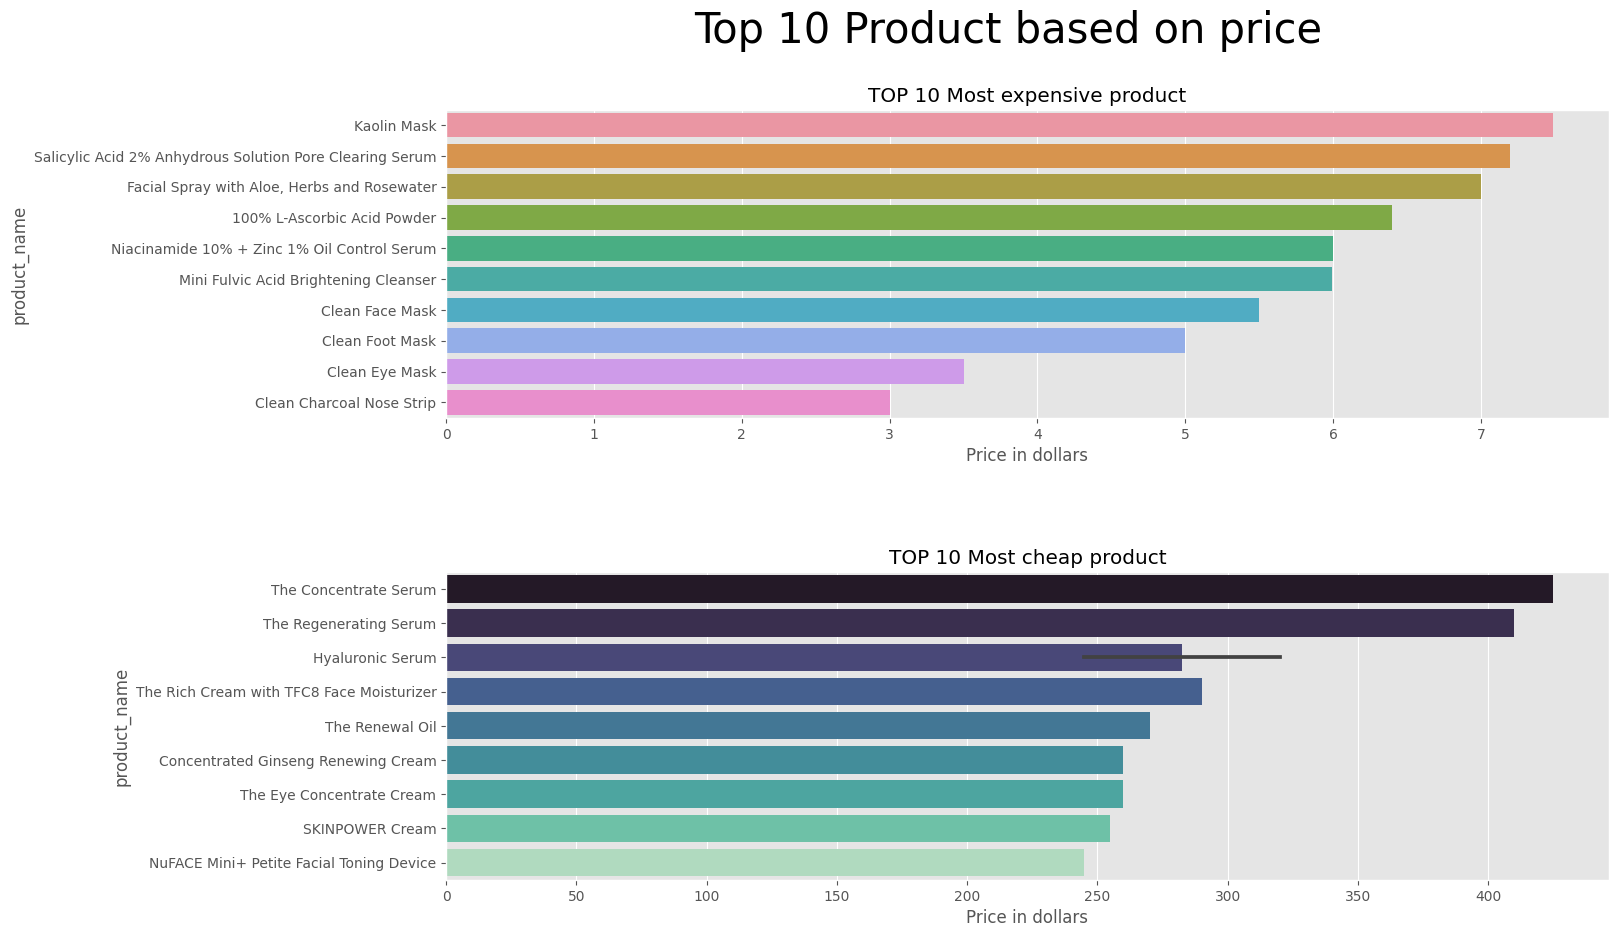

In [18]:
# Top 10 most expensive and cheap product

#Top 10  product
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_expensive = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=True).head(10).sort_values('price_usd',ascending=False)
most_expensive
sns.barplot(most_expensive,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("TOP 10 Most expensive product")
ax1.set_xlabel("Price in dollars")

cheapest = df.groupby(['product_id','product_name','price_usd']).sum(numeric_only=True).reset_index()\
.sort_values('price_usd',ascending=False).head(10)
sns.barplot(cheapest,x='price_usd',y='product_name',ax=ax2,palette='mako')
ax2.set_title("TOP 10 Most cheap product")
ax2.set_xlabel("Price in dollars")

plt.suptitle("Top 10 Product based on price",fontsize=30)

Text(0.5, 0.98, 'Most reccomended product for each skin types')

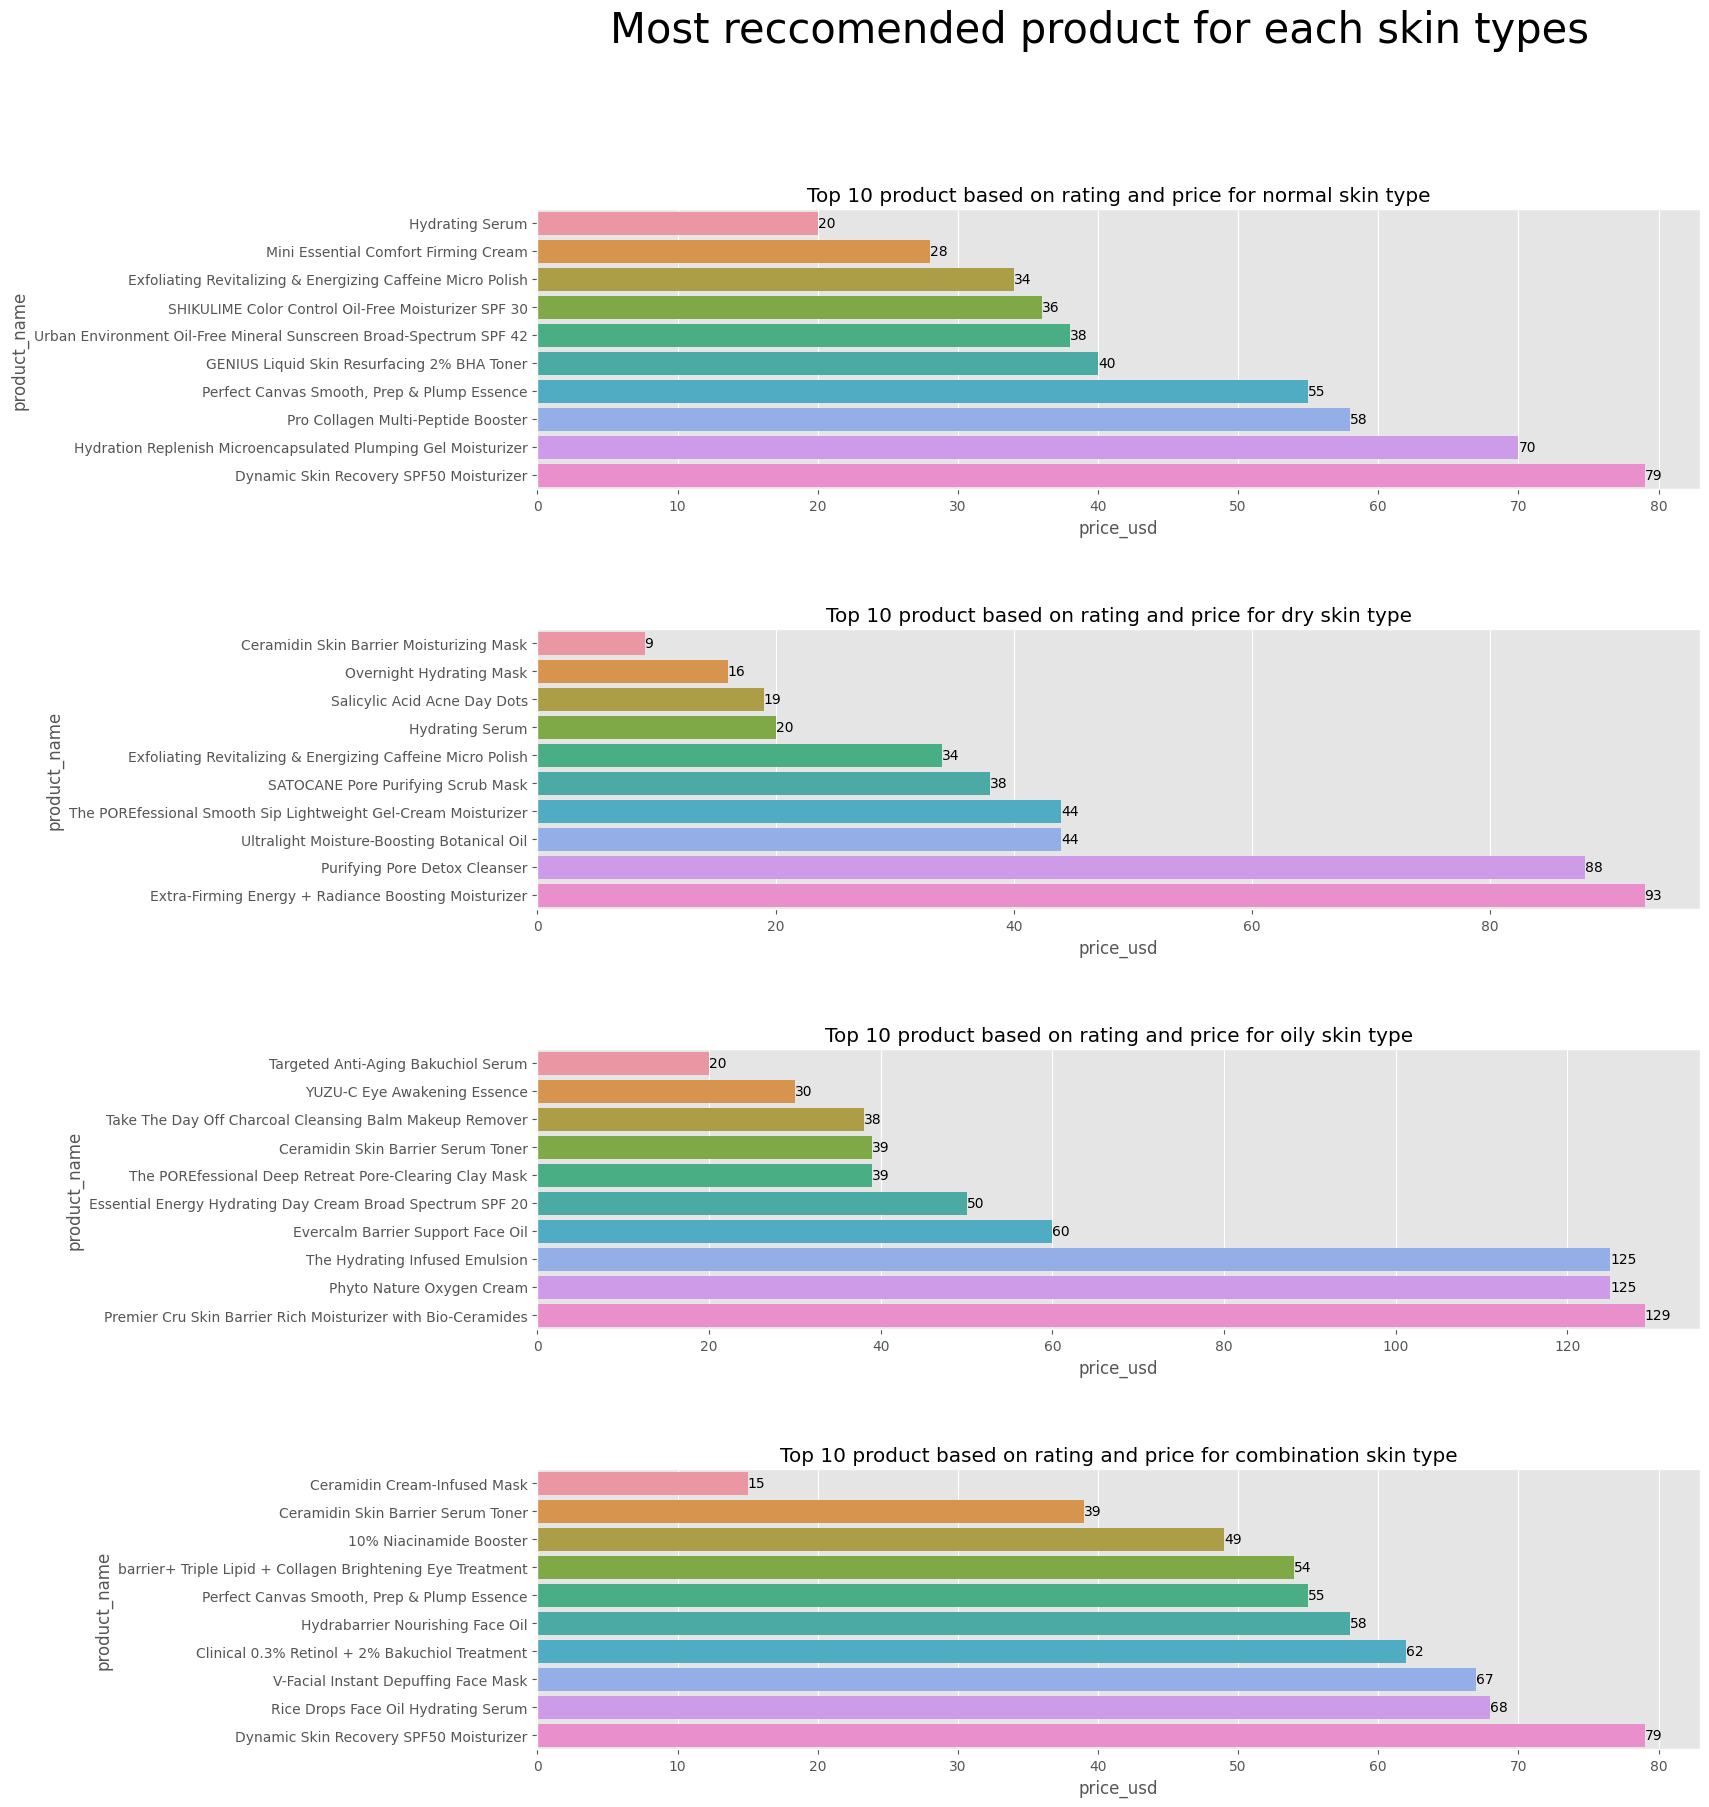

In [19]:
# Most reccomended product for each skin_type
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,figsize= (15,20))
fig.subplots_adjust(hspace=0.5)

product_skin = df.groupby(['skin_type','product_id','product_name','price_usd']).mean(numeric_only=True)['rating'].reset_index()\
.sort_values('rating',ascending=False)

normal_skin = product_skin[product_skin['skin_type'] == 'normal'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax1 = sns.barplot(normal_skin,x='price_usd',y='product_name',ax=ax1)
ax1.set_title("Top 10 product based on rating and price for normal skin type")
for i in ax1.containers:
    ax1.bar_label(i)

dry_skin = product_skin[product_skin['skin_type'] == 'dry'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax2 = sns.barplot(dry_skin,x='price_usd',y='product_name',ax=ax2)
ax2.set_title("Top 10 product based on rating and price for dry skin type")
for i in ax2.containers:
    ax2.bar_label(i)

oily_skin = product_skin[product_skin['skin_type'] == 'oily'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax3 = sns.barplot(oily_skin,x='price_usd',y='product_name',ax=ax3)
ax3.set_title("Top 10 product based on rating and price for oily skin type")
for i in ax3.containers:
    ax3.bar_label(i)

combination_skin = product_skin[product_skin['skin_type'] == 'combination'].sort_values('price_usd',ascending=True)\
.sort_values(['rating'],ascending=False).head(10)\
.sort_values('price_usd',ascending=True)
ax4 = sns.barplot(combination_skin,x='price_usd',y='product_name',ax=ax4)
ax4.set_title("Top 10 product based on rating and price for combination skin type")
for i in ax4.containers:
    ax4.bar_label(i)


fig.suptitle("Most reccomended product for each skin types",fontsize=30)

<Axes: xlabel='loves_count', ylabel='price_usd'>

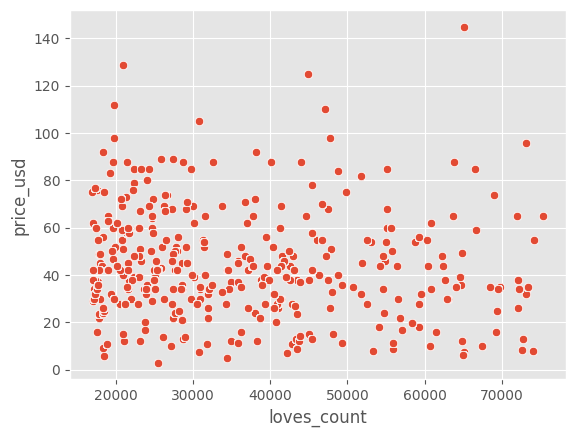

In [20]:
# Lets see the relationship between loves_count and the price_usd of the product
def remove_outliers(data, lower_quantile=0.25, upper_quantile=0.75):
    lower_bound = np.quantile(data, lower_quantile)
    upper_bound = np.quantile(data, upper_quantile)
    cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return cleaned_data
# Remove outliers using quantiles (5th percentile to 95th percentile)
cleaned_data = remove_outliers(df['loves_count'], lower_quantile=0.25, upper_quantile=0.75)

sns.scatterplot(df,x = cleaned_data,y=df['price_usd'])

<Axes: xlabel='is_recommended', ylabel='helpfulness'>

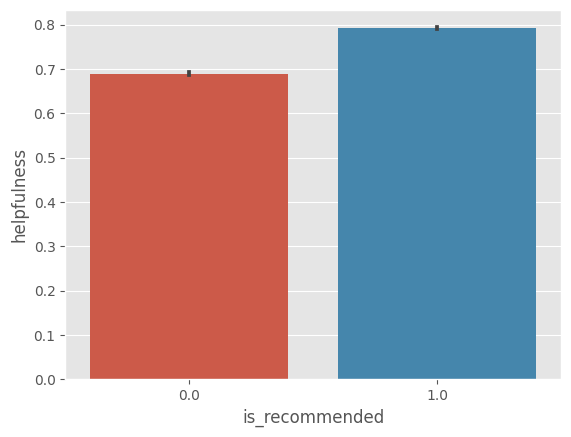

In [21]:
# Lets see is higher the is_recommended score also higher of helpfulness the product
sns.barplot(df,y = df['helpfulness'],x=df['is_recommended'])

# <h1 style='font-size:30px'>👍👎Sentinment Analysis !</h1>

**Sentiment analysis** is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral

"I will attempt to build a model to categorize products as recommended or not based on customer review_text.

The first step is to load the dataset and select the necessary columns.

Since the dataset is large, I will downsize it to expedite the model training process.

Additionally, we are dealing with an imbalanced dataset, so I will balance the labels."

In [22]:
df.shape

(205572, 39)

In [23]:
df = df[['review_text','is_recommended']]
df.head(5)


,review_text,is_recommended
16140,"Makeup remover, gentle cleanser, and all aroun...",1.0
16142,I wanted to love this so bad because it felt s...,0.0
16144,Best facial cleanser I have used! I heard grea...,1.0
16146,The smell is like roses and I don’t feel I get...,0.0
16147,"IM SO SAD! After 3 days of using this, my face...",0.0


In [24]:
df.is_recommended.value_counts()

1.0    159823
0.0     45749
Name: is_recommended, dtype: int64

## ✂️ DownSizing the dataset also handling imbalanced dataset

In [25]:
# Rename the columns
df.rename(columns={'review_text':'text', 'is_recommended':'label'},  inplace=True)

pos = df[df['label'] == 1].sample(10000)
neg = df[df['label'] == 0].sample(10000)

# Concat pos and neg label
df = pd.concat([pos,neg],axis=0)
df.shape

(20000, 2)

In [26]:
#Percentage of Positive/Negative
print("Positive: ", round(df.label.value_counts()[1]/len(df)*100 , 2 ),"%")
print("Negative: ", round(df.label.value_counts()[0]/len(df)*100, 2 ),"%")

Positive:  50.0 %
Negative:  50.0 %


## 🪓 Train and Test Split

In [27]:
from sklearn.model_selection import train_test_split
X = df.text.values
y = df.label.values

X_train,X_test,y_train,y_test = train_test_split(X,y.astype(int),test_size = 0.3,shuffle=True,random_state=42)

In [28]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

count    14000.000000
mean        62.633357
std         45.042743
min          1.000000
25%         33.000000
50%         51.000000
75%         79.000000
max        383.000000
dtype: float64

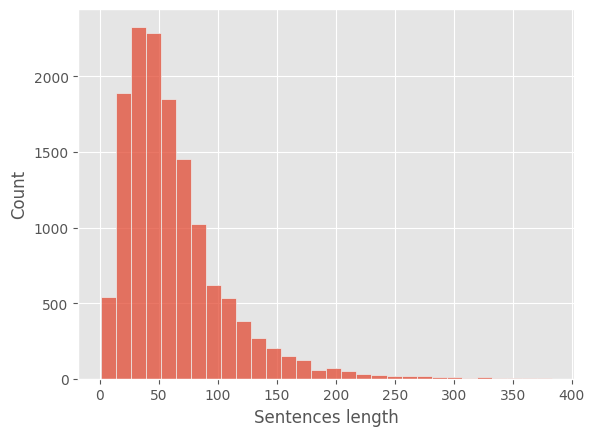

In [29]:
pd_hist = pd.Series([len(i.split()) for i in X_train])
pd_hist.head()
fig = sns.histplot(pd_hist,bins=30)
fig.set_xlabel("Sentences length")
pd_hist.describe()

## 🗒️Word embedding using BERT

In [30]:
import torch
is_cuda = torch.cuda.is_available()

# If we have a GPU available,
# we'll set our device to GPU. We'll use this device variable later in our code.

if is_cuda:
    device = torch.device('cuda')
    print("Cuda is available")
else:
    device = torch.device('cpu')
    print("Cuda is not available using Cpu instead")

Cuda is available


In [31]:
!pip install transformers

In [32]:
from transformers import BertTokenizer, BertModel,BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_train,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    max_length=128,
    truncation=True,
    return_tensors='pt'
)
# encoded_data_train.to(device)

In [34]:
encoded_data_val = tokenizer.batch_encode_plus(
   X_test,
    add_special_tokens=True,
    return_attention_mask=True,
    padding=True,
    max_length=128,
    truncation=True,
    return_tensors='pt'
)


In [35]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test)

In [36]:
labels_train

tensor([0, 0, 0,  ..., 1, 1, 0])

In [37]:
from torch.utils.data import DataLoader, TensorDataset
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                            attention_masks_val,
                           labels_val)

In [38]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

# Load your model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2,
    output_attentions=False,
    output_hidden_states=False,
)

# Move the model to the selected device
model.to(device)

# Rest of your code...


Using GPU.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [39]:
from torch.utils.data import DataLoader, RandomSampler
batch_size = 32

train_dataloader = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=batch_size
)

In [40]:
from transformers import AdamW, get_linear_schedule_with_warmup

# AdamW is an optimizer which is a Adam Optimzier with weight-decay-fix
optimizer = AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [41]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [42]:
#Creating the helper function to have a watch on elapsed time

import time
import datetime
#
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [43]:
#Let's start the training process

import random
import numpy as np
import torch
import time

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
#         print(b_labels.shape)
        # Always clear any previously calculated gradients before performing a
        # backward pass.
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():


            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    438.    Elapsed: 0:00:25.
  Batch    80  of    438.    Elapsed: 0:00:49.
  Batch   120  of    438.    Elapsed: 0:01:13.
  Batch   160  of    438.    Elapsed: 0:01:38.
  Batch   200  of    438.    Elapsed: 0:02:04.
  Batch   240  of    438.    Elapsed: 0:02:30.
  Batch   280  of    438.    Elapsed: 0:02:56.
  Batch   320  of    438.    Elapsed: 0:03:22.
  Batch   360  of    438.    Elapsed: 0:03:48.
  Batch   400  of    438.    Elapsed: 0:04:14.

  Average training loss: 0.25
  Training epoch took: 0:04:38

Running Validation...
  Accuracy: 0.93
  Validation took: 0:00:42

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    438.    Elapsed: 0:00:26.
  Batch    80  of    438.    Elapsed: 0:00:52.
  Batch   120  of    438.    Elapsed: 0:01:18.
  Batch   160  of    438.    Elapsed: 0:01:44.
  Batch   200  of    438.    Elapsed: 0:02:10.
  Batch   240  of    438.    Elapsed: 0:02:36.
  Batch   280  of    438.    Elap